In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Loading CO2 emissions data

df = pd.read_csv('../../data/raw/tidy_format_co2_emission_dataset.csv')
df.sample(7)

,Country,Year,CO2EmissionRate (mt)
2162,Sweden,1999,5.8
4998,Botswana,2014,3.2
3818,Chile,2008,4.3
3747,Somalia,2007,0.1
1886,Jordan,1998,3.1
659,Fiji,1992,1
807,Bahamas,1993,6.3


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               5572 non-null   object
 1   Year                  5572 non-null   int64 
 2   CO2EmissionRate (mt)  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [119]:
# Emission rate needs to be converted from string to numeric and '-' entries will be converted to NaN

def co2_to_float(value):
    try:
        return float(value)
    except:
        return None
    
df['CO2EmissionRate'] = df['CO2EmissionRate (mt)'].apply(co2_to_float)
df.sample(7)

,Country,Year,CO2EmissionRate (mt),CO2EmissionRate
803,Aruba,1993,24.3,24.3
3321,Palau,2005,9.6,9.6
3280,Kazakhstan,2005,11.7,11.7
5036,Faroe Islands,2014,-,NaN
816,Bhutan,1993,0.4,0.4
3498,Martinique,2006,4.7,4.7
5336,Slovakia,2015,6.4,6.4


In [120]:
df = df.dropna()
selected_columns = ['Country', 'Year', 'CO2EmissionRate']
df = df[selected_columns]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          5445 non-null   object 
 1   Year             5445 non-null   int64  
 2   CO2EmissionRate  5445 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 170.2+ KB


In [122]:
trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990      805.100
1991      820.600
1992      964.300
1993      975.500
1994      971.100
1995      969.100
1996      964.200
1997      970.300
1998      961.400
1999      943.800
2000      983.100
2001      971.700
2002      967.000
2003     1002.900
2004     1025.300
2005     1042.100
2006     1041.500
2007     1060.200
2008     1044.200
2009      988.100
2010      962.300
2011      956.400
2012      935.100
2013      919.400
2014      917.000
2015     1026.700
2018     1056.000
2021    13821.252
Name: CO2EmissionRate, dtype: float64

In [123]:
avg_trend = df.groupby('Year')['CO2EmissionRate'].mean()
avg_trend

Year
1990     4.548588
1991     4.610112
1992     4.894924
1993     4.951777
1994     4.904545
1995     4.869849
1996     4.869697
1997     4.900505
1998     4.855556
1999     4.766667
2000     4.940201
2001     4.882915
2002     4.859296
2003     5.039698
2004     5.152261
2005     5.236683
2006     5.233668
2007     5.327638
2008     5.382474
2009     5.146354
2010     5.145989
2011     5.114439
2012     4.973936
2013     4.890426
2014     4.903743
2015     5.159296
2018     5.306533
2021    71.243567
Name: CO2EmissionRate, dtype: float64

In [125]:
# To drop 2021 emissions as they are not consistent wtih rest of dataset

df = df[df['Year']<2021]

df

,Country,Year,CO2EmissionRate
199,Afghanistan,1990,0.2
200,Albania,1990,2.3
201,Algeria,1990,3.0
202,Angola,1990,0.4
203,Antigua and Barbuda,1990,4.9
...,...,...,...
5567,Venezuela,2018,3.7
5568,Vietnam,2018,2.8
5569,Yemen,2018,0.4
5570,Zambia,2018,0.3


In [126]:
trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990     805.1
1991     820.6
1992     964.3
1993     975.5
1994     971.1
1995     969.1
1996     964.2
1997     970.3
1998     961.4
1999     943.8
2000     983.1
2001     971.7
2002     967.0
2003    1002.9
2004    1025.3
2005    1042.1
2006    1041.5
2007    1060.2
2008    1044.2
2009     988.1
2010     962.3
2011     956.4
2012     935.1
2013     919.4
2014     917.0
2015    1026.7
2018    1056.0
Name: CO2EmissionRate, dtype: float64

In [127]:
avg_trend = df.groupby('Year')['CO2EmissionRate'].mean()
avg_trend

Year
1990    4.548588
1991    4.610112
1992    4.894924
1993    4.951777
1994    4.904545
1995    4.869849
1996    4.869697
1997    4.900505
1998    4.855556
1999    4.766667
2000    4.940201
2001    4.882915
2002    4.859296
2003    5.039698
2004    5.152261
2005    5.236683
2006    5.233668
2007    5.327638
2008    5.382474
2009    5.146354
2010    5.145989
2011    5.114439
2012    4.973936
2013    4.890426
2014    4.903743
2015    5.159296
2018    5.306533
Name: CO2EmissionRate, dtype: float64

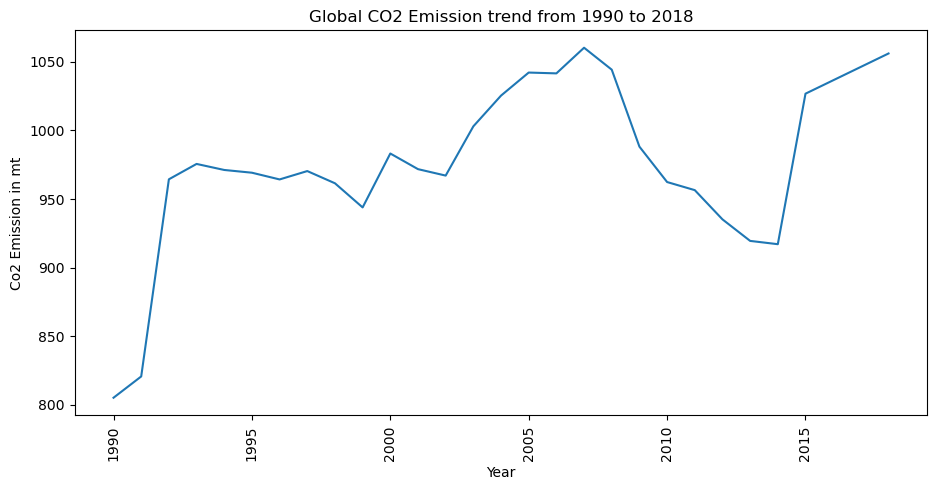

In [134]:
# Line plot to visualize trend
plt.figure(figsize=(11,5))
sns.lineplot(x=trend.index,y=trend.values)
plt.xticks(rotation=90)
plt.title('Global CO2 Emission trend from 1990 to 2018')
plt.xlabel('Year')
plt.ylabel('Co2 Emission in mt')
plt.show()

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5251.0,2003.080175,7.861967,1990.0,1996.0,2003.0,2010.0,2018.0
CO2EmissionRate,5251.0,4.997981,6.571756,0.0,0.7,2.7,7.2,65.8


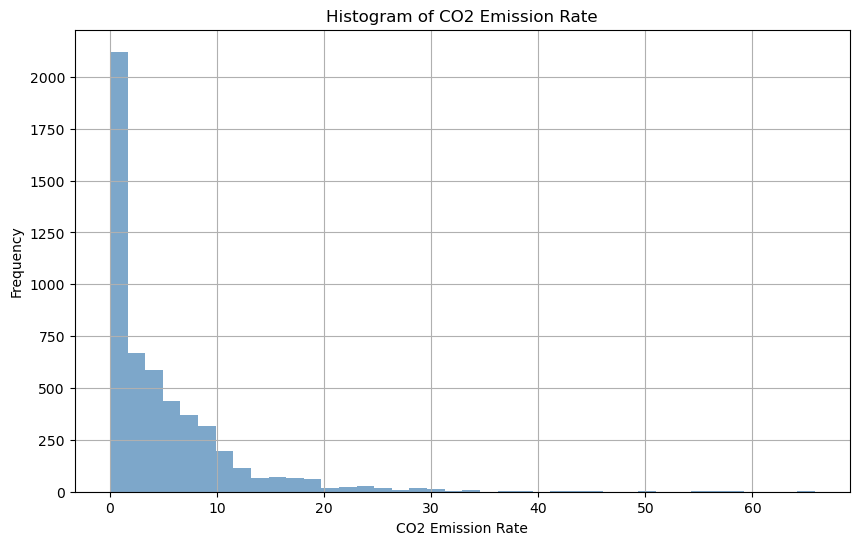

In [129]:
df['CO2EmissionRate'].hist(bins=40, figsize=(10, 6), color='steelblue', alpha=0.7)

plt.xlabel('CO2 Emission Rate')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emission Rate')

plt.show()

In [140]:
# Log transformation applied to the skewed data

df = df[df['CO2EmissionRate']>0]
df.loc[:, 'CO2_Emissions'] = df['CO2EmissionRate'].apply(lambda x: np.log10(x))

selected_columns = ['Country', 'Year', 'CO2_Emissions']
df = df[selected_columns]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 199 to 5571
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5152 non-null   object 
 1   Year           5152 non-null   int64  
 2   CO2_Emissions  5152 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.0+ KB


In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5152.0,2003.109666,7.852245,1990.0,1996.000000,2003.000000,2010.000000,2018.000000
CO2_Emissions,5152.0,0.325924,0.670364,-1.0,-0.154902,0.462398,0.863323,1.818226


In [160]:
df.duplicated().values.any()

False

In [298]:
df.to_csv('../../data/processed/clean_co2_emission_dataset.csv', index=False)

In [ ]:
# df['CO2_Emissions_log'] = np.log1p(df['CO2EmissionRate'])

# from sklearn.preprocessing import RobustScaler
# rs = RobustScaler()
# df['CO2_Emissions_scaled'] = rs.fit_transform(df[['CO2_Emissions_log']])

# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(output_distribution='normal')
# df['quantile_transformed'] = qt.fit_transform(df[['CO2EmissionRate']])

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# df.loc[:, 'CO2_scaled'] = ss.fit_transform(df[['CO2_Emissions']])

# df['sqrt_scaled'] = np.sqrt(df['CO2EmissionRate'])

# df['cube_root_scaled'] = np.cbrt(df['CO2EmissionRate'])

In [287]:
# df['CO2EmissionRate'].hist(bins=40, figsize=(10, 6), color='steelblue', alpha=0.7)

# plt.xlabel('CO2 Emission Rate')
# plt.ylabel('Frequency')
# plt.title('Histogram of CO2 Emission Rate')

# plt.show()

In [300]:
# Loading dataset to extract country latitudes and longitudes to be used as features

df_ll = pd.read_csv('../../data/raw/world_country_and_usa_states_latitude_and_longitude_values.csv')
df_ll.sample(7)

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
105,IR,32.427908,53.688046,Iran,NaN,NaN,NaN,NaN
144,MO,22.198745,113.543873,Macau,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
215,TL,-8.874217,125.727539,Timor-Leste,NaN,NaN,NaN,NaN
27,BO,-16.290154,-63.588653,Bolivia,NC,35.759573,-79.019300,North Carolina
168,OM,21.512583,55.923255,Oman,NaN,NaN,NaN,NaN
6,AM,40.069099,45.038189,Armenia,CT,41.603221,-73.087749,Connecticut


In [301]:
selected_columns = ['country', 'latitude', 'longitude']
df_ll = df_ll[selected_columns]

df_ll.sample(7)

,country,latitude,longitude
97,Hungary,47.162494,19.503304
182,Paraguay,-23.442503,-58.443832
13,Australia,-25.274398,133.775136
229,Uzbekistan,41.377491,64.585262
64,Spain,40.463667,-3.749220
31,Bouvet Island,-54.423199,3.413194
89,Guinea-Bissau,11.803749,-15.180413


In [293]:
# mask = df_ll.isna().any(axis=1)

# df_ll[mask]

# # Use the mask to retrieve rows with NaN values
# # rows_with_null = df_ll[mask]

,country,latitude,longitude
226,U.S. Minor Outlying Islands,NaN,NaN


In [302]:
df_ll.duplicated().values.any()

False

In [303]:
new_column_names = {'country':'Country',
                    'latitude':'Latitude',
                    'longitude':'Longitude'}
df_ll.rename(columns=new_column_names, inplace=True)

df_ll.sample(7)

,Country,Latitude,Longitude
160,Nigeria,9.081999,8.675277
168,Oman,21.512583,55.923255
150,Mauritius,-20.348404,57.552152
65,Ethiopia,9.145000,40.489673
3,Antigua and Barbuda,17.060816,-61.796428
239,Kosovo,42.602636,20.902977
62,Western Sahara,24.215527,-12.885834


In [305]:
df_ll.to_csv('../../data/processed/clean_lat_long_dataset.csv', index=False)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 199 to 5571
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5152 non-null   object 
 1   Year           5152 non-null   int64  
 2   CO2_Emissions  5152 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.0+ KB


In [192]:
# Adding latitude and longitude to be used as features

df_merged_ll = pd.merge(df, df_ll, on='Country', how='left')
df_merged_ll.head()

,Country,Year,CO2_Emissions,Latitude,Longitude
0,Afghanistan,1990,-0.698970,33.939110,67.709953
1,Albania,1990,0.361728,41.153332,20.168331
2,Algeria,1990,0.477121,28.033886,1.659626
3,Angola,1990,-0.397940,-11.202692,17.873887
4,Antigua and Barbuda,1990,0.690196,17.060816,-61.796428


In [211]:
df_merged_ll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 0 to 5151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5152 non-null   object 
 1   Year           5152 non-null   int64  
 2   CO2_Emissions  5152 non-null   float64
 3   Latitude       4996 non-null   float64
 4   Longitude      4996 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 241.5+ KB


In [210]:
df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()

array(['Democratic Republic of the Congo', 'Eswatini', 'Falkland Islands',
       'Ivory Coast', 'Myanmar',
       'Saint Helena, Ascension and Tristan da Cunha', 'North Macedonia'],
      dtype=object)

In [335]:
# # spain_data = df[df['Country'] == 'U.S. Minor Outlying Islands']
# # spain_data

# spain_data = df_ll[df_ll['Country'] == 'Congo [DRC]']
# spain_data

In [336]:
search = 'Congo|Swaziland|Malvinas|Ivoire|Malvinas|Burma|Helena|Macedonia'

missing_countries = df_ll[df_ll['Country'].str.contains(search, case=False, regex=True)]
missing_countries

,Country,Latitude,Longitude
37,Congo [DRC],-4.038333,21.758664
39,Congo [Republic],-0.228021,15.827659
41,Côte d'Ivoire,7.539989,-5.547080
68,Falkland Islands [Islas Malvinas],-51.796253,-59.523613
140,Macedonia [FYROM],41.608635,21.745275
142,Myanmar [Burma],21.913965,95.956223
195,Saint Helena,-24.143474,-10.030696
207,Swaziland,-26.522503,31.465866


In [348]:
country_mapping = {
    'Congo [DRC]': 'Democratic Republic of the Congo',
    'Côte d\'Ivoire': 'Ivory Coast',
    'Falkland Islands [Islas Malvinas]': 'Falkland Islands',
    'Macedonia [FYROM]': 'North Macedonia',
    'Myanmar [Burma]': 'Myanmar',
    'Saint Helena': 'Saint Helena, Ascension and Tristan da Cunha',
    'Swaziland': 'Eswatini'
}

# Update 'Country' column using the dictionary
missing_countries.loc[:,'Country'] = missing_countries['Country'].replace(country_mapping)
missing_countries

/var/folders/mk/01ggklcx2d7_5zgzbl9qk6h00000gn/T/ipykernel_85481/3199486517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_countries.loc[:,'Country'] = missing_countries['Country'].replace(country_mapping)


,Country,Latitude,Longitude
37,Democratic Republic of the Congo,-4.038333,21.758664
39,Congo [Republic],-0.228021,15.827659
41,Ivory Coast,7.539989,-5.547080
68,Falkland Islands,-51.796253,-59.523613
140,North Macedonia,41.608635,21.745275
142,Myanmar,21.913965,95.956223
195,"Saint Helena, Ascension and Tristan da Cunha",-24.143474,-10.030696
207,Eswatini,-26.522503,31.465866


In [365]:
# # Update 'Country' where it equals 'Congo [DRC]'
# # Find the 'Latitude' value for 'Democratic Republic of the Congo' in 'missing_countries'
# congo_latitude = missing_countries.loc[missing_countries['Country'] == 'Democratic Republic of the Congo', 'Latitude']
# # Update the 'Latitude' column in 'df_merged_ll' for 'Democratic Republic of the Congo'
# df_merged_ll.loc[df_merged_ll['Country'] == 'Democratic Republic of the Congo', 'Latitude'] = congo_latitude

# congo_longitude = missing_countries.loc[missing_countries['Country'] == 'Democratic Republic of the Congo', 'Longitude'].values[0]
# # Update the 'Latitude' column in 'df_merged_ll' for 'Democratic Republic of the Congo'
# df_merged_ll.loc[df_merged_ll['Country'] == 'Democratic Republic of the Congo', 'Latitude'] = congo_longitude

# ivoire_latitude = missing_countries.loc[missing_countries['Country'] == 'Ivory Coast', 'Latitude']
# # Update the 'Latitude' column in 'df_merged_ll' for 'Democratic Republic of the Congo'
# df_merged_ll.loc[df_merged_ll['Country'] == 'Ivory Coast', 'Latitude'] = congo_latitude

# congo_longitude = missing_countries.loc[missing_countries['Country'] == 'Ivory Coast', 'Longitude'].values[0]
# # Update the 'Latitude' column in 'df_merged_ll' for 'Democratic Republic of the Congo'
# df_merged_ll.loc[df_merged_ll['Country'] == 'Ivory Coast', 'Latitude'] = congo_longitude

# df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()
# df_merged_ll.loc[df_merged_ll['Country'] == 'Democratic Republic of the Congo', 'Latitude']


39      21.758664
209     21.758664
388     21.758664
580     21.758664
772     21.758664
965     21.758664
1159    21.758664
1354    21.758664
1550    21.758664
4435    21.758664
4621    21.758664
4806    21.758664
Name: Latitude, dtype: float64

In [371]:
for index, row in missing_countries.iterrows():
    print(row['Country'])

Democratic Republic of the Congo
Congo [Republic]
Ivory Coast
Falkland Islands
North Macedonia
Myanmar
Saint Helena, Ascension and Tristan da Cunha
Eswatini


In [372]:
# countries_to_update = pd.DataFrame({
#     'Country': missing_countries['Country'].to_list(),
#     'Latitude_col': ['Latitude', 'Latitude'],
#     'Longitude_col': ['Longitude', 'Longitude']
# })

for index, row in missing_countries.iterrows():
    country = row['Country']
    latitude_col = row['Latitude']
    longitude_col = row['Longitude']
    
    # Get the latitude and longitude values from 'missing_countries'
    country_latitude = missing_countries.loc[missing_countries['Country'] == country, 'Latitude'].values[0]
    country_longitude = missing_countries.loc[missing_countries['Country'] == country, 'Longitude'].values[0]
    
    # Update the 'Latitude' and 'Longitude' columns in 'df_merged_ll'
    df_merged_ll.loc[df_merged_ll['Country'] == country, 'Latitude'] = country_latitude
    df_merged_ll.loc[df_merged_ll['Country'] == country, 'Longitude'] = country_longitude

In [378]:
df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()

array([], dtype=object)

In [376]:
selected_columns = ['Country', 'Year', 'CO2_Emissions', 'Latitude', 'Longitude']
df_merged_ll = df_merged_ll[selected_columns]
df_merged_ll.head()

,Country,Year,CO2_Emissions,Latitude,Longitude
0,Afghanistan,1990,-0.698970,33.939110,67.709953
1,Albania,1990,0.361728,41.153332,20.168331
2,Algeria,1990,0.477121,28.033886,1.659626
3,Angola,1990,-0.397940,-11.202692,17.873887
4,Antigua and Barbuda,1990,0.690196,17.060816,-61.796428


In [380]:
df_merged_ll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 0 to 5151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5152 non-null   object 
 1   Year           5152 non-null   int64  
 2   CO2_Emissions  5152 non-null   float64
 3   Latitude       5152 non-null   float64
 4   Longitude      5152 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 241.5+ KB


In [381]:
df_merged_ll.to_csv('../../data/processed/merged_lat_long_dataset.csv', index=False)

In [175]:
# # merged_df = pd.merge(df1, df2, on='ID', how='inner')

# def merge_ll_columns(df):
#     df_merged_ll = df.merge(df_ll[['Latitude', 'Longitude']], on='Country', how='left')
#     return df_merged_ll

# df_merged_ll = merge_ll_columns(df)
# df_merged_ll.head()

# # df_2018 = make_region_column(df_2018)

In [261]:
df_pop = pd.read_csv('../../data/raw/countries of the world.csv')
df_pop.sample(7)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
151,Niger,SUB-SAHARAN AFRICA,12525094,1267000,"9,9","0,00","-0,67","121,69",800.0,"17,6","1,9","3,54","0,01","96,45",1,"50,73","20,91","0,39","0,17","0,44"
107,Kenya,SUB-SAHARAN AFRICA,34707817,582650,"59,6","0,09","-0,1","61,47",1000.0,"85,1","8,1","8,08","0,98","90,94","1,5","39,72","14,02","0,163","0,188","0,651"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
121,Luxembourg,WESTERN EUROPE,474413,2586,"183,5","0,00","8,97","4,81",55100.0,"100,0","515,4","23,28","0,4","76,32",NaN,"11,94","8,41","0,01","0,13","0,86"
70,French Guiana,LATIN AMER. & CARIB,199509,91000,"2,2","0,42","6,27","12,07",8300.0,"83,0","255,6","0,14","0,05","99,81",2,"20,46","4,88","0,066","0,156","0,778"
116,Lesotho,SUB-SAHARAN AFRICA,2022331,30355,"66,6","0,00","-0,74","84,23",3000.0,"84,8","23,7","10,87","0,13",89,3,"24,75","28,71","0,163","0,443","0,394"
165,Puerto Rico,LATIN AMER. & CARIB,3927188,13790,"284,8","3,63","-1,46","8,24",16800.0,"94,1","283,1","3,95","5,52","90,53",2,"12,77","7,65","0,01","0,45","0,54"


In [262]:
selected_columns = ['Country', 'Region', 'Population', 'Area (sq. mi.)']
df_pop = df_pop[selected_columns]
df_pop = df_pop.rename(columns={'Area (sq. mi.)': 'Area_sq_mi'}, inplace=False)

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     227 non-null    object
 1   Region      227 non-null    object
 2   Population  227 non-null    int64 
 3   Area_sq_mi  227 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.2+ KB


In [263]:
df_pop['Density_per_sq_mi'] = df_pop['Population'] / df_pop['Area_sq_mi']

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            227 non-null    object 
 1   Region             227 non-null    object 
 2   Population         227 non-null    int64  
 3   Area_sq_mi         227 non-null    int64  
 4   Density_per_sq_mi  227 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ KB


In [264]:
df_pop.duplicated().values.any()

False

In [265]:
df_pop.sample(7)

,Country,Region,Population,Area_sq_mi,Density_per_sq_mi
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.964474
15,Bahrain,NEAR EAST,698585,665,1050.503759
136,"Micronesia, Fed. St.",OCEANIA,108004,702,153.851852
37,Cape Verde,SUB-SAHARAN AFRICA,420979,4033,104.383585
68,Finland,WESTERN EUROPE,5231372,338145,15.470795
47,Cook Islands,OCEANIA,21388,240,89.116667
12,Austria,WESTERN EUROPE,8192880,83870,97.685466


In [243]:
df_merged_features = pd.merge(df_merged_ll, df_pop, on='Country', how='left')
df_merged_features.sample(7)

,Country,Year,CO2_Emissions,Latitude,Longitude,Region,Population,Area_sq_mi,Density_per_sq_mi
4049,Bulgaria,2011,0.826075,42.733883,25.485830,NaN,NaN,NaN,NaN
3003,Pakistan,2005,-0.096910,30.375321,69.345116,NaN,NaN,NaN,NaN
4477,Japan,2013,0.991226,36.204824,138.252924,NaN,NaN,NaN,NaN
1040,Namibia,1995,0.000000,-22.957640,18.490410,NaN,NaN,NaN,NaN
3833,Venezuela,2009,0.812913,6.423750,-66.589730,NaN,NaN,NaN,NaN
1345,China,1997,0.447158,35.861660,104.195397,NaN,NaN,NaN,NaN
996,Guyana,1995,0.301030,4.860416,-58.930180,NaN,NaN,NaN,NaN


In [233]:
df_merged_features = df_merged_ll.merge(df_pop[['Region', 'Country']], on='Country', how='left')
df_merged_features.sample(7)

,Country,Year,CO2_Emissions,Latitude,Longitude,Region
2990,Myanmar,2005,-0.698970,NaN,NaN,NaN
1837,Paraguay,1999,-0.045757,-23.442503,-58.443832,NaN
4437,Djibouti,2013,-0.154902,11.825138,42.590275,NaN
3427,Spain,2007,0.908485,40.463667,-3.749220,NaN
2847,Tajikistan,2004,-0.397940,38.861034,71.276093,NaN
1923,Cambodia,2000,-0.698970,12.565679,104.990963,NaN
5115,Slovakia,2018,0.845098,48.669026,19.699024,NaN


In [214]:
df_merged_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 0 to 5151
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5152 non-null   object 
 1   Year           5152 non-null   int64  
 2   CO2_Emissions  5152 non-null   float64
 3   Latitude       4996 non-null   float64
 4   Longitude      4996 non-null   float64
 5   Region         0 non-null      object 
 6   Population     0 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 322.0+ KB


In [259]:
def country_to_string(value):
    try:
        return str(value)
    except:
        return None
df_pop['Country'] = df['Country'].apply(country_to_string)
# df_pop.sample(7)
spain_data = df_pop[df_pop['Country'] == 'Spain']
spain_data

,Country,Region,Population,Area_sq_mi,Density_per_sq_mi


In [268]:
df_pop['Country'] = df_pop['Country'].apply(str)

In [272]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            227 non-null    object 
 1   Region             227 non-null    object 
 2   Population         227 non-null    int64  
 3   Area_sq_mi         227 non-null    int64  
 4   Density_per_sq_mi  227 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ KB


In [286]:
msk = df_pop['Country'] == 'Spain'

df_pop[msk]

# spain_data = df_pop[df_pop['Country'] == 'Spain']
# spain_data

,Country,Region,Population,Area_sq_mi,Density_per_sq_mi


In [271]:
df_pop.sample(7)

,Country,Region,Population,Area_sq_mi,Density_per_sq_mi
41,Chile,LATIN AMER. & CARIB,16134219,756950,21.314775
15,Bahrain,NEAR EAST,698585,665,1050.503759
105,Jordan,NEAR EAST,5906760,92300,63.995233
197,Syria,NEAR EAST,18881361,185180,101.962204
64,Estonia,BALTICS,1324333,45226,29.282559
69,France,WESTERN EUROPE,60876136,547030,111.284822
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,87.992646


In [219]:
df_features = df_merged_ll.drop(['Year'], axis=1)

## Modeling

In [220]:
corr_mat = df_features.corr(numeric_only=True)
corr_mat

,CO2_Emissions,Latitude,Longitude
CO2_Emissions,1.000000,0.419709,0.004103
Latitude,0.419709,1.000000,0.063718
Longitude,0.004103,0.063718,1.000000


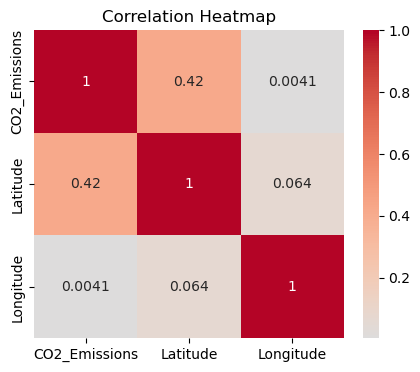

In [225]:
plt.figure(figsize=(5, 4))

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../../data/processed/heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
y = df_features['CO2_Emissions']
X = df_features[['Latitude', 'Longitude']]


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Define the target variable (y) and predictor variables (X)
y = df_features['CO2_Emissions']
X = df_features[['Latitude', 'Longitude']]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# You can also examine the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


In [229]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame named 'df_features' with the columns 'CO2_Emissions', 'Latitude', and 'Longitude'

# Step 1: Define the target variable (y) and predictor variables (X)
y = df_features['CO2_Emissions']
X = df_features[['Latitude', 'Longitude']]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data using Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Step 5: Evaluate the Lasso model's performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")

# Step 6: Create and fit a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)

# Step 7: Make predictions on the test data using Ridge
y_pred_ridge = ridge_model.predict(X_test)

# Step 8: Evaluate the Ridge model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")


In [230]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame named 'df_features' with the columns 'CO2_Emissions', 'Latitude', and 'Longitude'

# Step 1: Define the target variable (y) and predictor variables (X)
y = df_features['CO2_Emissions']
X = df_features[['Latitude', 'Longitude']]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 4: Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Step 6: Evaluate the XGBoost model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


XGBoost Regression:
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.93
